In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# uniques values in all non-numerical columns of data frame to find out Nan values
def colUnique(df):
    for x in df.columns:
            if df[x].dtype=='object':
                print(df[x].unique(),'\n')
                
# Converting non-numerical values to numerical values
def dummy(df):
    df=pd.get_dummies(df)
    return df               

# normalizing the whole numerical data
def normalize(df,col):
    for x in col:
        mean=df[x].mean()
        std=df[x].std()
        df[x]=(df[x]-mean)/std
    return df
    
# separating target and input variables.
def sepxy(df,col):
    x=df.drop(col,axis=1)
    y=df[col]
    return x,y

# Randomly shuffling the whole dataframe with respect to rows.
def shuffleit(df):
    return df.sample(frac=1)

# Separating and returning dataframe parts according to K-fold configuration.
def separate(df,k,num):
    if (k*num<=len(df) and k*2<len(df)):
        valid=df.iloc[k*(num-1):k*num]
        train=df.drop(range(k*(num-1),k*num),axis=0)
        valid=valid.reset_index(drop='true')
        train=train.reset_index(drop='true')
        return train,valid
    elif (k*num<=len(df) and k*2>len(df)):        
        valid=df.iloc[k*num:]
        train=df.drop(range(k*num,len(df)),axis=0)
        valid=valid.reset_index(drop='true')
        train=train.reset_index(drop='true')
        return train,valid
    else:
        valid=df.iloc[k*(num-1):]
        train=df.drop(range(k*(num-1),len(df)),axis=0)
        valid=valid.reset_index(drop='true')
        train=train.reset_index(drop='true')
        return train,valid


In [3]:
#def derivative(x,y,beta):
#    return -2 * np.dot(x.transpose(),y - np.dot(x,beta))

def derivative(x,y,beta,lamb):
    temp=len(beta)
    der=np.zeros(temp)
# -xn(yn-y(xn))+2lamb*betaj
    for count in range(temp):
        tem=np.dot(x,beta)
        tem=y-tem
        first=-2*np.dot(x.transpose().iloc[count],tem)
        second=2*lamb*beta[count]
#        print(x.iloc[count].transpose().shape,tem.shape,"\n")
        der[count]=first+second
    return der


In [4]:
def lossfunc(x,y,beta):
    tem = y - np.dot(x,beta)
    return  np.dot(tem.transpose(),tem.transpose())



In [5]:
def rmse(x,y,beta):
    first=np.dot(x,beta)
    first=y-first
    second=(first**2).sum()
    rmse=(second/len(y))**(1/2)
    return rmse

In [6]:

def mbgd(x,y,beta,alpha,imax,epsilon,batches,lamb):
    r,c=x.shape
    betaold=beta
    betanew=np.zeros(c)
    for itr in range(imax):
        for re in range(int(r/batches)):            
            betanew=beta-alpha*derivative(x.iloc[re*batches:(re+1)*batches],y.iloc[re*batches:(re+1)*batches],beta,lamb)
            beta=betanew
            if (abs(lossfunc(x,y,betanew)-lossfunc(x,y,betaold)))<epsilon:
                    return betanew
        betaold=betanew
    return betanew

In [7]:

def mbgdWithRMSE(x,y,beta,alpha,imax,epsilon,batches,lamb,xtest,ytest):
    r,c=x.shape
    betaold=beta
    betanew=np.zeros(c)
    rmsetest=np.zeros(imax)
    rmsetrain=np.zeros(imax)
    for itr in range(imax):
        for re in range(int(r/batches)):            
            betanew=beta-alpha*derivative(x.iloc[re*batches:(re+1)*batches],y.iloc[re*batches:(re+1)*batches],beta,lamb)
            beta=betanew
            if (abs(lossfunc(x,y,betanew)-lossfunc(x,y,betaold)))<epsilon:
                    rmsetrain[itr]=rmse(x,y,betanew)
                    rmsetest[itr]=rmse(xtest,ytest,betanew)
                    return betanew,rmsetrain,rmsetest,itr
        rmsetrain[itr]=rmse(x,y,betanew)
        rmsetest[itr]=rmse(xtest,ytest,betanew)
        betaold=betanew
    return betanew,rmsetrain,rmsetest,itr

In [8]:
df=pd.read_csv("C:/anaconda3/Assignments/5th/winequality-red.csv",sep=';')
df.head()
ytopre='quality'

In [9]:
df=df.dropna(axis=0)
df=dummy(df)
df=normalize(df,df.columns)
df=shuffleit(df)
train,test=separate(df,int(len(df)*0.2),1)


In [10]:

batchsize=50

small=0.1
large=0.9
step=0.375
lamb=np.arange(small,large,step)

start=0.0009
stepsize=[start,start/10,start/100]

epsilon=start/1000

imax=100

k=5

In [11]:
error=np.zeros(k*len(lamb)*len(stepsize))
counter=0

#loop to vary the value of regularization constant
for lam in range(len(lamb)):
#loop to vary the value of stepsize
    for alp in range(len(stepsize)): 
#loop to perform k-fold operation
        for x in range(k):
#separating training and validation data
            ktrain,kvalid=separate(train,k,x+1)
#further separating x and y from training and validation data
            kxtrain,kytrain=sepxy(ktrain,ytopre)
            kxvalid,kyvalid=sepxy(kvalid,ytopre)
#mini-Bactch Gradient descent 
            r,c=kxtrain.shape
            beta=np.zeros(c)
            betaPre=mbgd(kxtrain,kytrain,beta,stepsize[alp],imax,epsilon,batchsize,lamb[lam])
#RMSE collection. Tested on validatoin data.
            error[counter]=rmse(kxvalid,kyvalid,betaPre)
            counter=counter+1

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


IndexError: index 45 is out of bounds for axis 0 with size 45

In [12]:
err=np.zeros(len(lamb)*len(stepsize))
plotLamb=np.zeros(len(lamb)*len(stepsize))
plotStep=np.zeros(len(lamb)*len(stepsize))
tem=0
for tem in range(len(lamb)*len(stepsize)):
    err[tem]=(error[tem*k:(tem+1)*(k)].sum())/k
tem=0
for first in lamb:
    for second in stepsize:
        plotLamb[tem]=first
        plotStep[tem]=second
        tem=tem+1
stepnorm=10000
lambnorm=10
plotStep=plotStep*stepnorm
plotLamb=plotLamb*lambnorm

In [47]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(plotLamb,plotStep,err, zdir='z', c= 'red')
ax.plot(plotStep,plotLamb,err,color='red')
ax.set_xlabel('Step Size multiplied by 10000')
ax.set_ylabel('Lambda multiplied by 10')
ax.set_zlabel('RMSE of validation data')
plt.show()
#plt.xlabel('Step Size multiplied by 10000')
#plt.ylabel('Lambda multiplied by 10')
#plt.zlabel('RMSE of validation data')
#plt.savefig("demo.png")


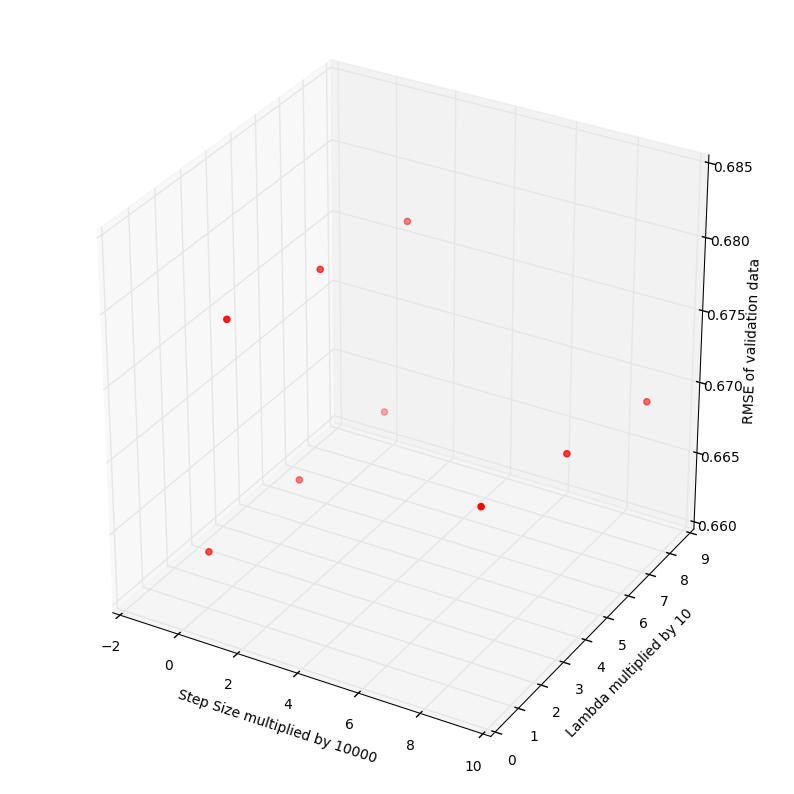

In [48]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(plotLamb,plotStep,err, zdir='z', c= 'red')
ax.scatter(plotStep,plotLamb,err,color='red')
ax.set_xlabel('Step Size multiplied by 10000')
ax.set_ylabel('Lambda multiplied by 10')
ax.set_zlabel('RMSE of validation data')
plt.show()
#plt.xlabel('Step Size multiplied by 10000')
#plt.ylabel('Lambda multiplied by 10')
#plt.zlabel('RMSE of validation data')
#plt.savefig("demo.png")


In [54]:
ind=(err.argmin())
print("Best RMSE tested on validation data = ",err.min())
print("best combination of hyper parameter:  Lambda = ",plotLamb[ind]," Step Size = ",plotStep[ind])

Best RMSE tested on validation data =  0.662684250555
best combination of hyper parameter:  Lambda =  8.5  Step Size =  0.09


In [17]:
train,test=separate(df,int(len(df)*0.2),1)
xtrain,ytrain=sepxy(train,ytopre)
xtest,ytest=sepxy(test,ytopre)


In [18]:
betaPre,rmsetrain,rmsetest,itr=mbgdWithRMSE(xtrain,ytrain,beta,plotStep[ind]/stepnorm,imax,epsilon,batchsize
                                            ,plotLamb[ind]/lambnorm,xtest,ytest)

In [25]:
def plotit(rmsetest,rmsetrain,itr):
    testmin=min(rmsetest)
    testmax=max(rmsetest)
    trainmin=min(rmsetrain)
    trainmax=max(rmsetrain)
    plt.plot(range(itr),rmsetest[0:itr])
    plt.title('Test RMSE')
    plt.xlabel('no. of iterations', fontsize=10)
    plt.ylabel('RMSE', fontsize=10)
    plt.show()
    plt.title('Training RMSE')
    plt.plot(range(itr),rmsetrain[0:itr])
    plt.xlabel('no. of iterations', fontsize=10)
    plt.ylabel('RMSE', fontsize=10)
    plt.show()

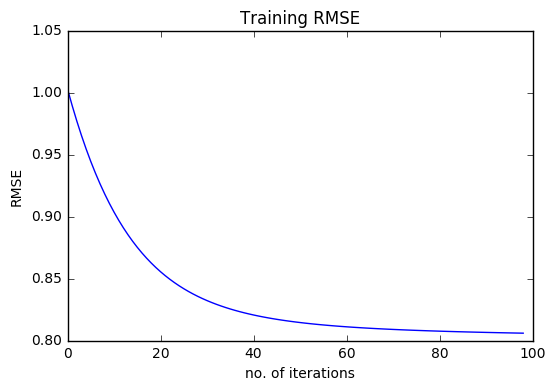

In [26]:
plotit(rmsetest,rmsetrain,itr)

In [29]:
print("Best Training data RMSE  =   ",rmsetrain[itr],"\n""Best Test data RMSE  = ",rmsetest[itr])

Best Training data RMSE  =    0.805835426055 
Best Test data RMSE  =  0.808468492828
